In [1]:
import pandas as pd
import numpy as np

In [53]:
# Reads in the data from the csv file
df1103 = pd.read_csv('data/df_1103.csv')
df1201 = pd.read_csv('data/df_1201.csv')
df1103['datetime'] = pd.to_datetime(df1103['datetime'])
df1201['datetime'] = pd.to_datetime(df1201['datetime'])


In [54]:
df1103.set_index('datetime', inplace=True)
df1201.set_index('datetime', inplace=True)

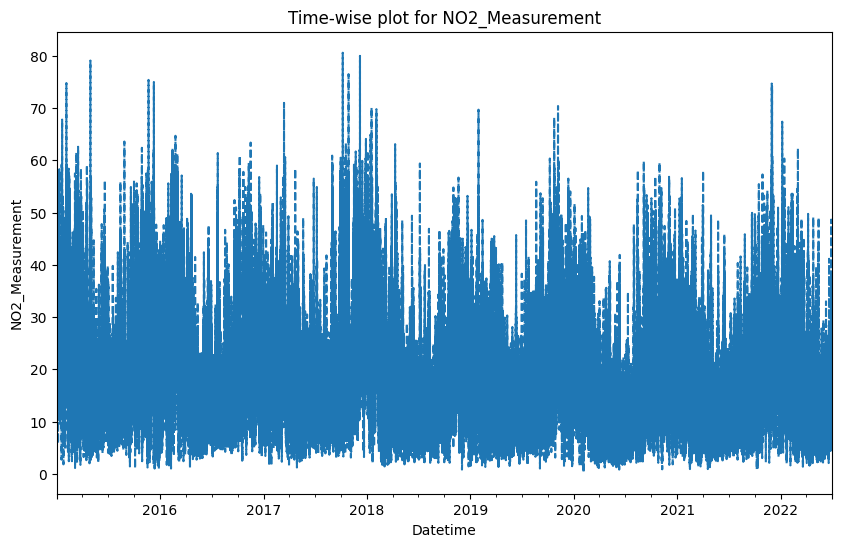

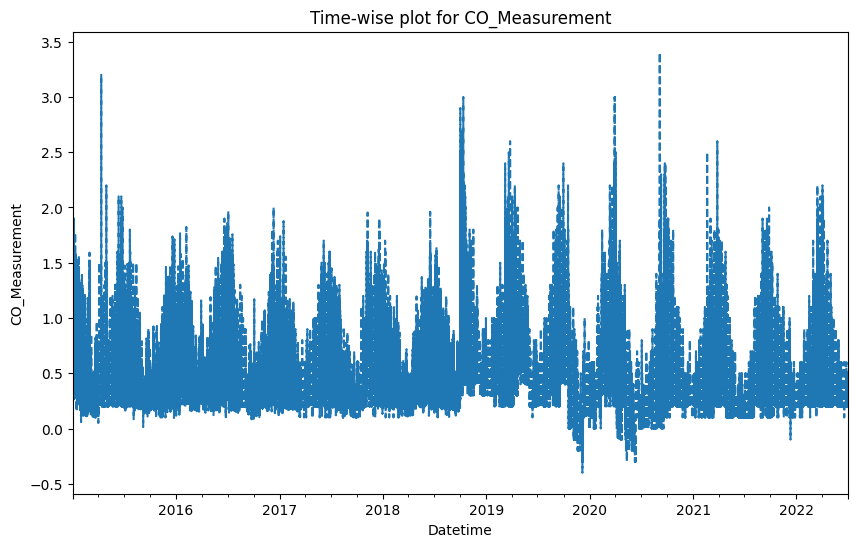

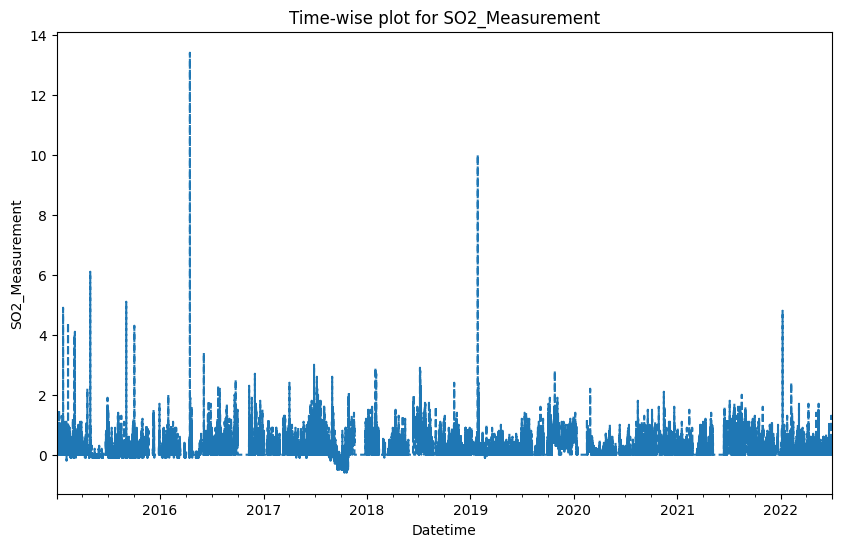

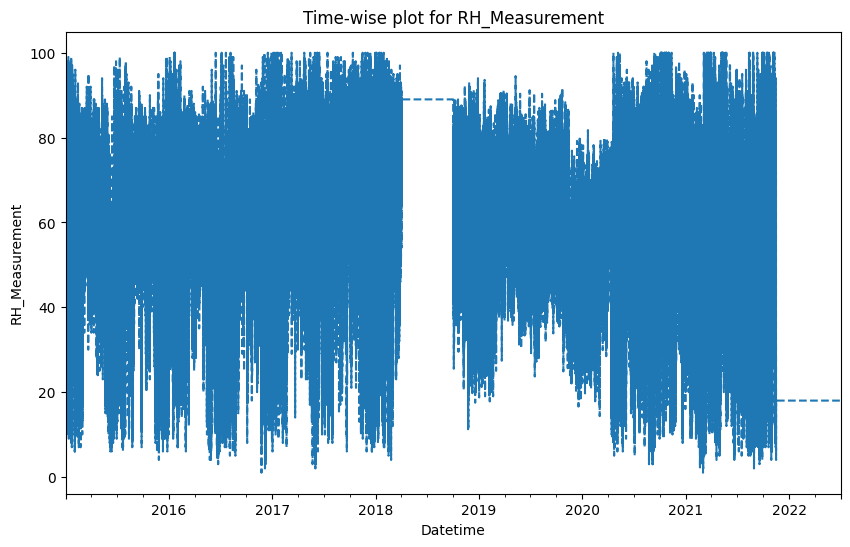

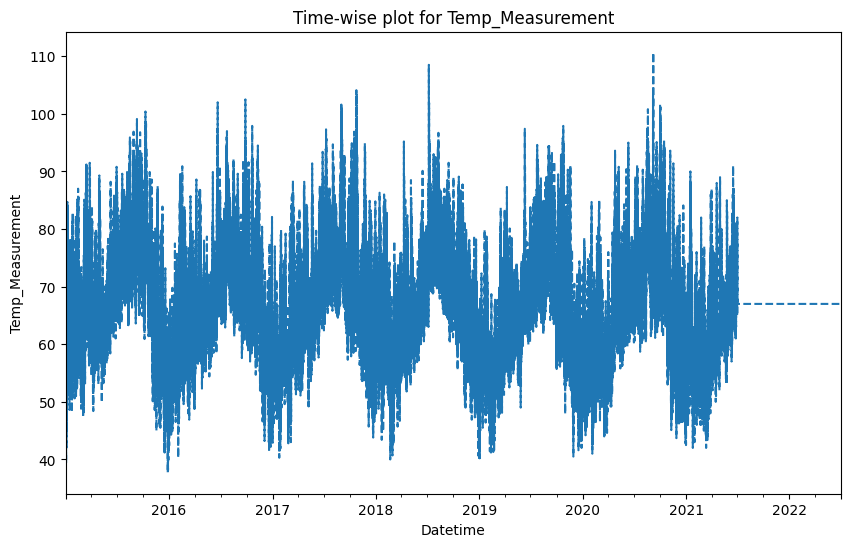

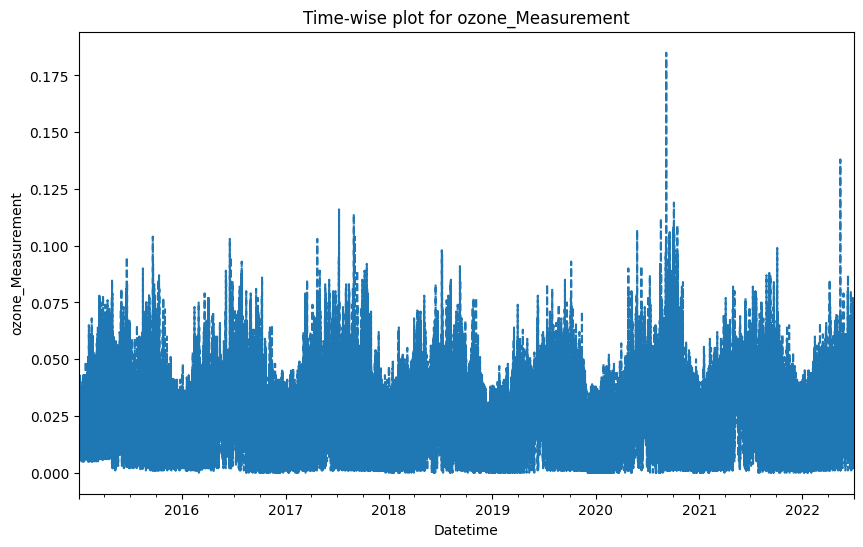

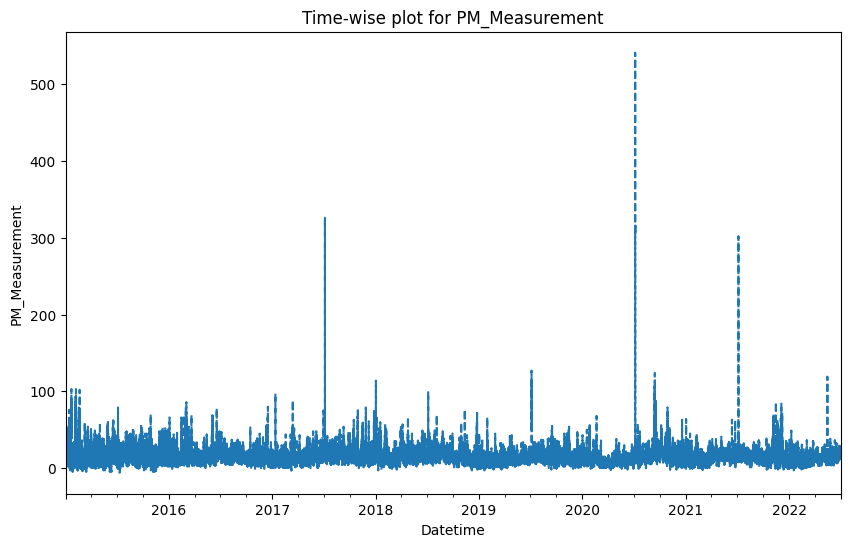

In [57]:
import matplotlib.pyplot as plt

for column in df1103.columns:
    if column != 'Unnamed: 0' and column != 'AQS_Code':
        plt.figure(figsize=(10, 6))
        df1103[column].plot(title=f'Time-wise plot for {column}',linestyle='--')
        plt.xlabel('Datetime')
        plt.ylabel(column)
        plt.show()
        

In [44]:
df1103.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,52332.000000,65712.000000,65712.000000,65712.000000
mean,65711.000000,1103.0,18.922900,0.428865,0.137238,55.775931,65.802707,0.024876,15.203386
std,37939.129563,0.0,12.180621,0.316351,0.278709,26.521060,9.259292,0.018636,10.879135
min,0.000000,1103.0,0.200000,-0.400000,-0.600000,1.000000,37.700000,0.000000,-6.000000
25%,32855.500000,1103.0,8.800000,0.200000,0.000000,32.000000,59.600000,0.007000,9.000000
50%,65711.000000,1103.0,16.000000,0.300000,0.000000,59.000000,66.800000,0.024000,13.000000
75%,98566.500000,1103.0,27.262500,0.511000,0.200000,80.000000,70.500000,0.038000,19.000000
max,131422.000000,1103.0,80.600000,3.400000,13.400000,100.000000,110.600000,0.185000,541.000000


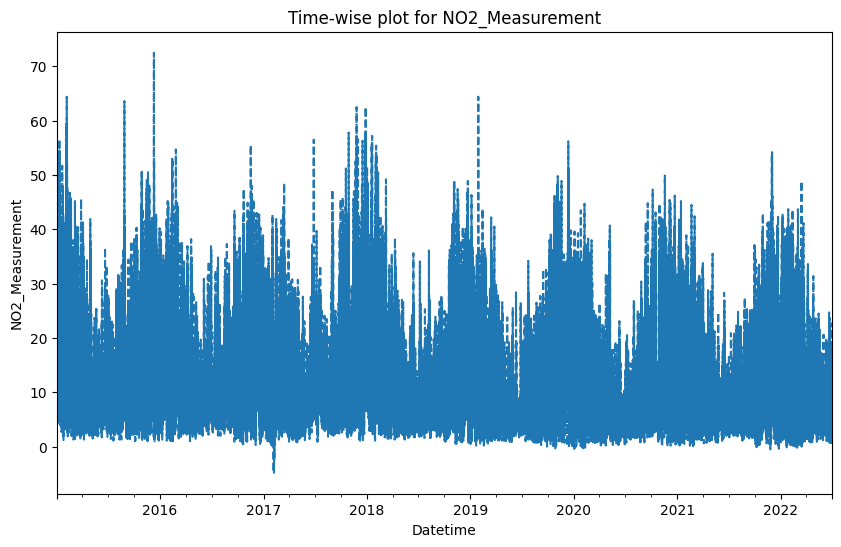

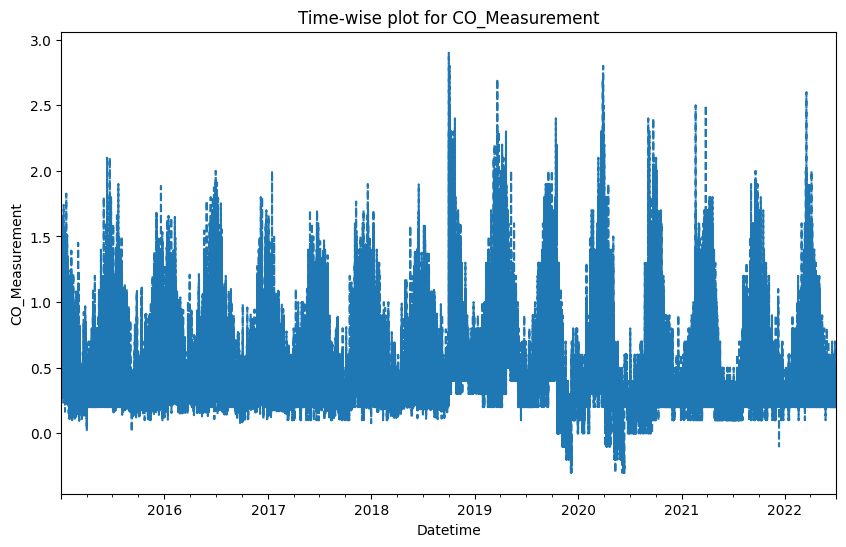

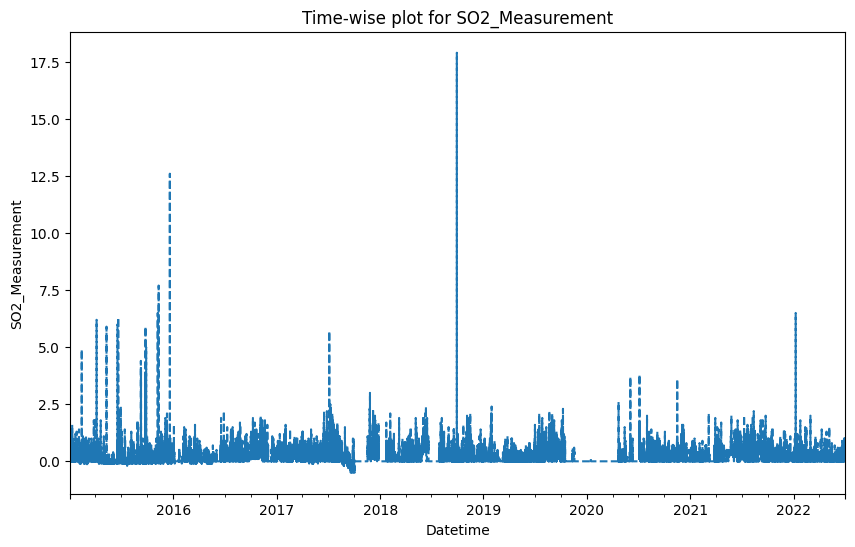

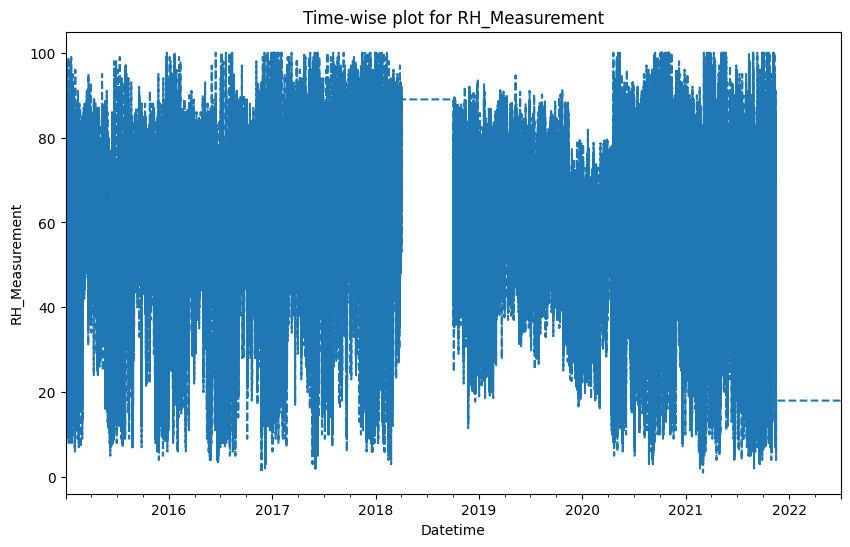

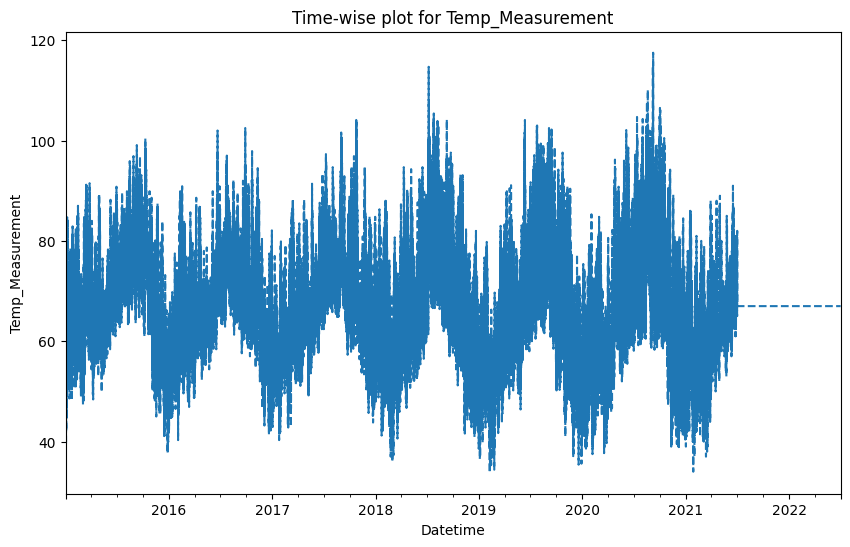

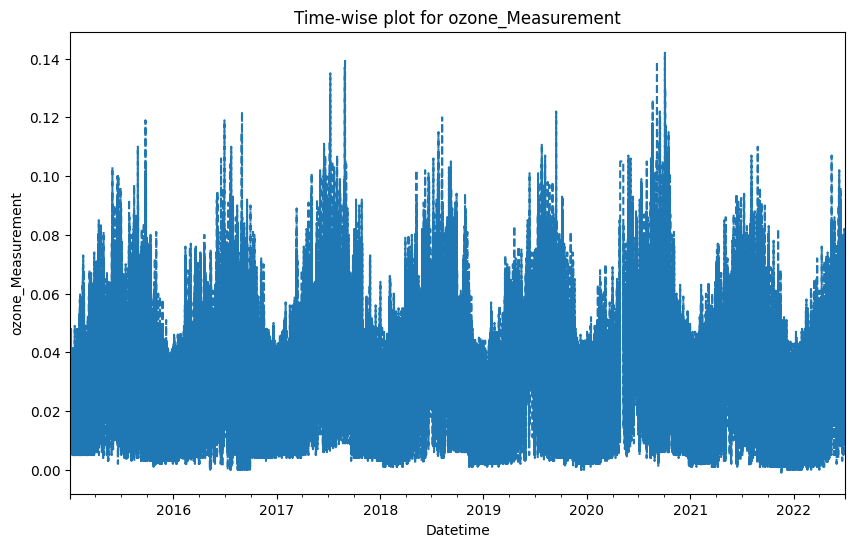

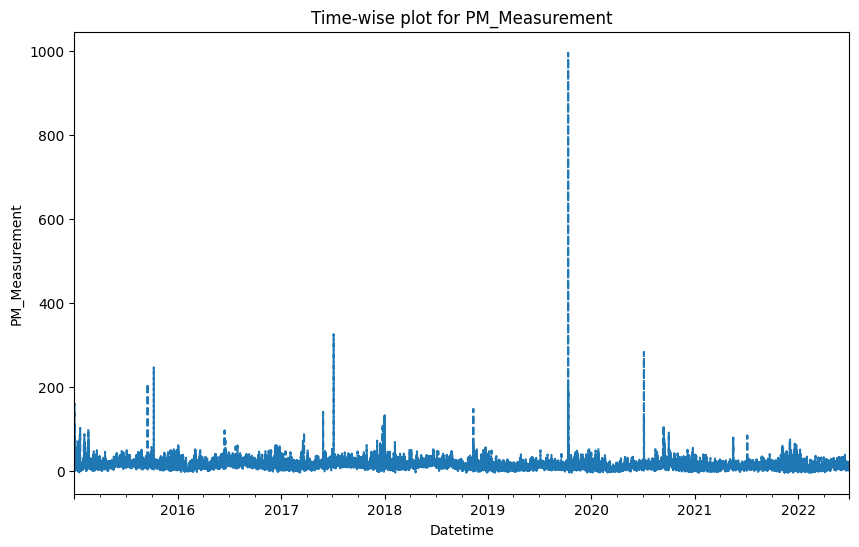

In [58]:
import matplotlib.pyplot as plt


for column in df1201.columns:
    if column != 'Unnamed: 0' and column != 'AQS_Code':
        plt.figure(figsize=(10, 6))
        df1201[column].plot(title=f'Time-wise plot for {column}',linestyle='--')
        plt.xlabel('Datetime')
        plt.ylabel(column)
        plt.show()

In [37]:
df1201.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,52332.000000,65712.000000,65712.000000,65712.000000
mean,65712.000000,1201.0,11.950138,0.426555,0.148405,55.779313,66.078211,0.033669,14.602232
std,37939.129563,0.0,9.604563,0.314977,0.290082,26.537391,10.755264,0.021195,10.656137
min,1.000000,1201.0,-4.800000,-0.300000,-0.500000,1.000000,33.800000,-0.001000,-3.700000
25%,32856.500000,1201.0,4.600000,0.200000,0.000000,32.000000,59.200000,0.017000,8.400000
50%,65712.000000,1201.0,8.500000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,98567.500000,1201.0,17.500000,0.506000,0.200000,80.000000,71.500000,0.046000,19.000000
max,131423.000000,1201.0,72.500000,2.900000,17.900000,100.000000,117.500000,0.142000,995.600000


In [40]:
df1103.head()

,Unnamed: 0,datetime,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
0,0,2015-01-01 08:00:00,1103,32.9,1.1620,0.5,49.0,41.2,0.007,46.0
1,2,2015-01-01 09:00:00,1103,32.2,1.2735,0.0,55.0,39.9,0.007,59.0
2,4,2015-01-01 10:00:00,1103,30.7,0.8810,0.3,56.0,39.1,0.006,66.0
3,6,2015-01-01 11:00:00,1103,31.5,0.4940,0.0,47.0,38.0,0.008,54.0
4,8,2015-01-01 12:00:00,1103,30.6,0.3105,0.1,40.0,38.1,0.006,50.0


In [56]:
def fill_missing_rh(df):
    df = df.copy()

    for idx in df[df['RH_Measurement'].isna()].index:
        values = []
        
        for year_offset in [1, 2]:
            for direction in [-2,-1, 1]:  # Looking at past and future years
                lookup_idx = idx + pd.DateOffset(years=year_offset * direction)
                if lookup_idx in df.index and pd.notna(df.at[lookup_idx, 'RH_Measurement']):
                    values.append(df.at[lookup_idx, 'RH_Measurement'])
        
        if values:  # If we found any valid values, take the average
            df.at[idx, 'RH_Measurement'] = sum(values) / len(values)
    return df

df1103 = fill_missing_rh(df1103)
df1201 = fill_missing_rh(df1201)



In [59]:
df1103.isna().sum()

Unnamed: 0           0
AQS_Code             0
NO2_Measurement      0
CO_Measurement       0
SO2_Measurement      0
RH_Measurement       0
Temp_Measurement     0
ozone_Measurement    0
PM_Measurement       0
dtype: int64

# Removing the Negative Values

In [60]:
# Function to replace negative values with 0
def replace_negative_values(data):
    for column in data.columns:
        if column != 'datetime':
            data[column] = data[column].apply(lambda x: 0 if x < 0 else x)
    return data


In [61]:
df1103 = replace_negative_values(df1103)
df1201 = replace_negative_values(df1201)

In [8]:
df1103.describe()

,Unnamed: 0,datetime,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712,65712.0,65712.000000,65712.000000,65712.000000,52332.000000,65712.000000,65712.000000,65712.000000
mean,65711.000000,2018-10-01 07:30:00,1103.0,18.922900,0.430660,0.141578,55.775931,65.802707,0.024876,15.208219
min,0.000000,2015-01-01 08:00:00,1103.0,0.200000,0.000000,0.000000,1.000000,37.700000,0.000000,0.000000
25%,32855.500000,2016-11-15 19:45:00,1103.0,8.800000,0.200000,0.000000,32.000000,59.600000,0.007000,9.000000
50%,65711.000000,2018-10-01 07:30:00,1103.0,16.000000,0.300000,0.000000,59.000000,66.800000,0.024000,13.000000
75%,98566.500000,2020-08-15 19:15:00,1103.0,27.262500,0.511000,0.200000,80.000000,70.500000,0.038000,19.000000
max,131422.000000,2022-07-01 07:00:00,1103.0,80.600000,3.400000,13.400000,100.000000,110.600000,0.185000,541.000000
std,37939.129563,NaN,0.0,12.180621,0.313441,0.274194,26.521060,9.259292,0.018636,10.871812


In [9]:
df1201.describe()

,Unnamed: 0,datetime,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712,65712.0,65712.00000,65712.000000,65712.000000,52332.000000,65712.000000,65712.000000,65712.000000
mean,65712.000000,2018-10-01 07:30:00,1201.0,11.95104,0.428380,0.150854,55.779313,66.078211,0.033669,14.610299
min,1.000000,2015-01-01 08:00:00,1201.0,0.00000,0.000000,0.000000,1.000000,33.800000,0.000000,0.000000
25%,32856.500000,2016-11-15 19:45:00,1201.0,4.60000,0.200000,0.000000,32.000000,59.200000,0.017000,8.400000
50%,65712.000000,2018-10-01 07:30:00,1201.0,8.50000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,98567.500000,2020-08-15 19:15:00,1201.0,17.50000,0.506000,0.200000,80.000000,71.500000,0.046000,19.000000
max,131423.000000,2022-07-01 07:00:00,1201.0,72.50000,2.900000,17.900000,100.000000,117.500000,0.142000,995.600000
std,37939.129563,NaN,0.0,9.60330,0.312016,0.288035,26.537391,10.755264,0.021195,10.644348


# Removing Outliers

In [62]:
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]
    
    return lower_bound, upper_bound, num_outliers, outliers


def outlier_processing(data, column_name):
    # Make a copy of the DataFrame to avoid modifying the original
    data_copy = data.copy()
    
    # Convert index to DatetimeIndex if it's not already
    if not isinstance(data_copy.index, pd.DatetimeIndex):
        try:
            data_copy.index = pd.to_datetime(data_copy.index)
        except ValueError:
            raise ValueError("Index cannot be converted to DatetimeIndex")

    # Detect outliers using IQR method
    lower_bound, upper_bound, num_outliers, outliers = detect_outliers_iqr(data_copy, column_name)
    
    # Iterate through each outlier
    for idx in outliers.index:
        current_index = idx
        # Check next hour data
        next_index = current_index + pd.Timedelta(hours=1)
        prev_year_index = current_index - pd.DateOffset(years=1)
        next_year_index = current_index + pd.DateOffset(years=1)
        similar_time = data_copy[(data_copy.index.month == next_year_index.month) & (data_copy.index.day == next_year_index.day) & (data_copy.index.hour == next_year_index.hour)]
        #check next hour data
        if next_index in data_copy.index and data_copy.at[next_index, column_name] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = data_copy.at[next_index, column_name]
        # Check previous hour data
        elif prev_year_index in data_copy.index and data_copy.at[prev_year_index, column_name] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = data_copy.at[prev_year_index, column_name]
        # Check data from the same time in the previous year     
        elif prev_year_index in data_copy.index and data_copy.at[prev_year_index, column_name] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = data_copy.at[prev_year_index, column_name]
        # Check data from a similar time in the next year
        elif not similar_time.empty and similar_time[column_name].values[0] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = similar_time[column_name].values[0]
        else:
            # If no similar time is found, replace the outlier with the lower or upper bound
            if data_copy.at[current_index, column_name] > upper_bound:
                data_copy.at[current_index, column_name] = upper_bound
            elif data_copy.at[current_index, column_name] < lower_bound:
                data_copy.at[current_index, column_name] = lower_bound

    # Check if the number of outliers is as expected
    print(f'Number of outliers for {column_name} are {num_outliers}')

    return data_copy


In [63]:
def cleaner(data):
    for col in data.columns:
        if col!='datetime' and col!='PM_Measurement' and col!='AQS_Code' and col!='Unnamed: 0':
            print(col)
            data=outlier_processing(data, col)
    return data

In [64]:
df1103_clean=cleaner(df1103)

NO2_Measurement
Number of outliers for NO2_Measurement are 294
CO_Measurement
Number of outliers for CO_Measurement are 4917
SO2_Measurement
Number of outliers for SO2_Measurement are 5595
RH_Measurement
Number of outliers for RH_Measurement are 0
Temp_Measurement
Number of outliers for Temp_Measurement are 1651
ozone_Measurement
Number of outliers for ozone_Measurement are 177


In [66]:
df1103.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,65711.000000,1103.0,18.922900,0.430660,0.141578,56.359639,65.802707,0.024876,15.208219
std,37939.129563,0.0,12.180621,0.313441,0.274194,24.709227,9.259292,0.018636,10.871812
min,0.000000,1103.0,0.200000,0.000000,0.000000,1.000000,37.700000,0.000000,0.000000
25%,32855.500000,1103.0,8.800000,0.200000,0.000000,37.000000,59.600000,0.007000,9.000000
50%,65711.000000,1103.0,16.000000,0.300000,0.000000,59.000000,66.800000,0.024000,13.000000
75%,98566.500000,1103.0,27.262500,0.511000,0.200000,77.333333,70.500000,0.038000,19.000000
max,131422.000000,1103.0,80.600000,3.400000,13.400000,100.000000,110.600000,0.185000,541.000000


In [67]:
df1103_clean.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,65711.000000,1103.0,18.837890,0.382745,0.083846,56.359639,65.600581,0.024794,15.208219
std,37939.129563,0.0,11.989855,0.219330,0.148539,24.709227,8.743818,0.018398,10.871812
min,0.000000,1103.0,0.200000,0.000000,0.000000,1.000000,43.250000,0.000000,0.000000
25%,32855.500000,1103.0,8.800000,0.200000,0.000000,37.000000,59.600000,0.007000,9.000000
50%,65711.000000,1103.0,16.000000,0.300000,0.000000,59.000000,66.750000,0.024000,13.000000
75%,98566.500000,1103.0,27.200000,0.500000,0.100000,77.333333,70.500000,0.038000,19.000000
max,131422.000000,1103.0,54.956250,0.977500,0.500000,100.000000,86.850000,0.084500,541.000000


In [65]:
df1201_clean=cleaner(df1201)

NO2_Measurement
Number of outliers for NO2_Measurement are 1257
CO_Measurement
Number of outliers for CO_Measurement are 4881
SO2_Measurement
Number of outliers for SO2_Measurement are 5375
RH_Measurement
Number of outliers for RH_Measurement are 0
Temp_Measurement
Number of outliers for Temp_Measurement are 2078
ozone_Measurement
Number of outliers for ozone_Measurement are 791


In [68]:
df1201.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.00000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,65712.000000,1201.0,11.95104,0.428380,0.150854,56.362545,66.078211,0.033669,14.610299
std,37939.129563,0.0,9.60330,0.312016,0.288035,24.725470,10.755264,0.021195,10.644348
min,1.000000,1201.0,0.00000,0.000000,0.000000,1.000000,33.800000,0.000000,0.000000
25%,32856.500000,1201.0,4.60000,0.200000,0.000000,37.000000,59.200000,0.017000,8.400000
50%,65712.000000,1201.0,8.50000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,98567.500000,1201.0,17.50000,0.506000,0.200000,77.166667,71.500000,0.046000,19.000000
max,131423.000000,1201.0,72.50000,2.900000,17.900000,100.000000,117.500000,0.142000,995.600000


In [69]:
df1201_clean.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,65712.000000,1201.0,11.628634,0.381334,0.094359,56.362545,65.789902,0.033175,14.610299
std,37939.129563,0.0,8.974584,0.218353,0.154478,24.725470,9.960948,0.020177,10.644348
min,1.000000,1201.0,0.000000,0.000000,0.000000,1.000000,40.750000,0.000000,0.000000
25%,32856.500000,1201.0,4.600000,0.200000,0.000000,37.000000,59.200000,0.017000,8.400000
50%,65712.000000,1201.0,8.500000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,98567.500000,1201.0,17.200000,0.500000,0.200000,77.166667,71.400000,0.046000,19.000000
max,131423.000000,1201.0,36.850000,0.965000,0.500000,100.000000,89.950000,0.089500,995.600000


In [70]:
# Saving
df1103_clean.to_csv('data/df1103_clean.csv')
df1201_clean.to_csv('data/df1201_clean.csv')

# Scaling

In [75]:
# Reads in the data from the csv file
df1103 = pd.read_csv('data/df1103_clean.csv')
df1201 = pd.read_csv('data/df1201_clean.csv')

In [77]:
df1103.drop(columns=['Unnamed: 0'], inplace=True)
df1201.drop(columns=['Unnamed: 0'], inplace=True)

In [80]:
from sklearn.preprocessing import StandardScaler

 
import joblib

def scale_data(df, columns_to_scale, scaler_filename):
    # Select columns to scale
    df_to_scale = df[columns_to_scale]

    # Initialize MinMaxScaler
    scaler = StandardScaler() 

    # Fit the scaler on the data and transform it
    scaled_data = scaler.fit_transform(df_to_scale)

    # Convert the scaled data back to a DataFrame
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df_to_scale.index)

    # Concatenate the scaled data with the remaining columns
    remaining_columns = df.drop(columns=columns_to_scale)
    scaled_df_with_remaining = pd.concat([scaled_df, remaining_columns], axis=1)

    # Save the scaler for future use
    joblib.dump(scaler, scaler_filename)

    return scaled_df_with_remaining

# Define columns to scale
columns_to_scale = ['NO2_Measurement', 'CO_Measurement', 'SO2_Measurement', 'RH_Measurement', 'Temp_Measurement', 'ozone_Measurement', 'PM_Measurement']

# Scale and save data for df1103
scaled_df1103 = scale_data(df1103, columns_to_scale, 'scaler_df1103.pkl')

# Scale and save data for df1201
scaled_df1201 = scale_data(df1201, columns_to_scale, 'scaler_df1201.pkl')



In [81]:
scaled_df1103.describe()

,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement,AQS_Code
count,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,65712.0
mean,-1.132119e-16,-1.643573e-16,6.660797e-17,3.252545e-16,-1.724671e-16,-8.347623e-17,8.380062e-18,1103.0
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0
min,-1.554483e+00,-1.745078e+00,-5.644756e-01,-2.240461e+00,-2.556178e+00,-1.347687e+00,-1.398878e+00,1103.0
25%,-8.372050e-01,-8.332034e-01,-5.644756e-01,-7.835043e-01,-6.862708e-01,-9.672007e-01,-5.710425e-01,1103.0
50%,-2.366927e-01,-3.772663e-01,-5.644756e-01,1.068581e-01,1.314560e-01,-4.316152e-02,-2.031157e-01,1103.0
75%,6.974374e-01,5.346080e-01,1.087520e-01,8.488268e-01,5.603337e-01,7.178119e-01,3.487744e-01,1103.0
max,3.012433e+00,2.711708e+00,2.801662e+00,1.766170e+00,2.430240e+00,3.245331e+00,4.836321e+01,1103.0


In [82]:
scaled_df1201.describe()

,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement,AQS_Code
count,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,6.571200e+04,65712.0
mean,-6.314782e-17,1.167802e-17,6.920309e-18,1.859833e-16,-2.418864e-16,9.515425e-17,1.269444e-16,1201.0
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0
min,-1.295739e+00,-1.746423e+00,-6.108262e-01,-2.239107e+00,-2.513826e+00,-1.644186e+00,-1.372598e+00,1201.0
25%,-7.831770e-01,-8.304673e-01,-6.108262e-01,-7.831072e-01,-6.615788e-01,-8.016473e-01,-5.834408e-01,1201.0
50%,-3.486131e-01,-3.724895e-01,-6.108262e-01,1.066704e-01,1.214851e-01,4.089098e-02,-1.606780e-01,1201.0
75%,6.207985e-01,5.434662e-01,6.838633e-01,8.414109e-01,5.632135e-01,6.356239e-01,4.124005e-01,1201.0
max,2.810332e+00,2.673063e+00,2.625898e+00,1.764892e+00,2.425500e+00,2.791531e+00,9.216132e+01,1201.0


In [19]:
# Saving
scaled_df1103.to_csv('data/df1103_scaled.csv')
scaled_df1201.to_csv('data/df1201_scaled.csv')

In [20]:
import pandas as pd 
scaled_df1103 = pd.read_csv('data/df1103_scaled.csv')

In [21]:
scaled_df1103

,Unnamed: 0,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement,datetime,AQS_Code
0,0,0.597260,1.000000,1.0,0.484848,0.00000,0.083333,0.085028,2015-01-01 08:00:00,1103
1,1,0.584475,1.000000,0.0,0.545455,0.00000,0.083333,0.109057,2015-01-01 09:00:00,1103
2,2,0.557078,0.901279,0.6,0.555556,0.00000,0.071429,0.121996,2015-01-01 10:00:00,1103
3,3,0.571689,0.505371,0.0,0.464646,0.00000,0.095238,0.099815,2015-01-01 11:00:00,1103
4,4,0.555251,0.317647,0.2,0.393939,0.00000,0.071429,0.092421,2015-01-01 12:00:00,1103
...,...,...,...,...,...,...,...,...,...,...
65707,65707,0.121461,0.204604,0.0,0.171717,0.54535,0.380952,0.024954,2022-07-01 03:00:00,1103
65708,65708,0.141553,0.204604,0.0,0.171717,0.54535,0.345238,0.024399,2022-07-01 04:00:00,1103
65709,65709,0.149772,0.204604,0.0,0.171717,0.54535,0.309524,0.021811,2022-07-01 05:00:00,1103
65710,65710,0.214612,0.306905,0.0,0.171717,0.54535,0.250000,0.024399,2022-07-01 06:00:00,1103
